In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

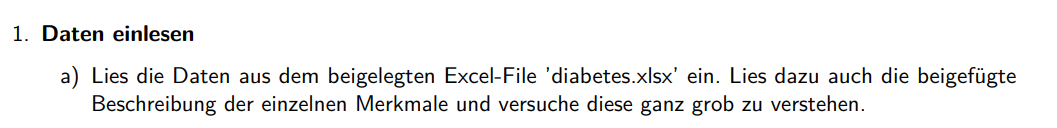

In [117]:
data = pd.read_excel('diabetes.xlsx', sheet_name='data', skiprows = 2)
data.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [118]:
# Spaltennamen printen
for i in data.columns:
    print(i)

n_pregnant
gtt
blood_pressure
triceps_skin_fold_thickness
insulin
bmi
dpf
age
class


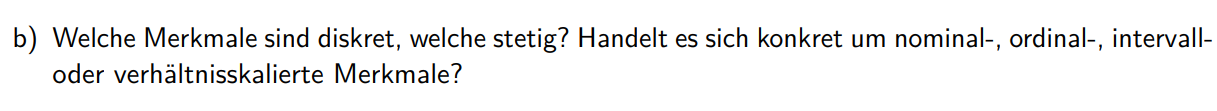

stetig:
- bmi
- dpf

diskret:
- n_pregnant
- age
- class

# Aufgabe 2a
Untersuche zuerst die Verteilungen der einzelnen Merkmale, jedes für sich. Gibt es auffällige Werte,
die auf Datenfehler, Ausreisser oder fehlende Werte hinweisen?


In [123]:
# Überprüfen ob die Dataframe NaN Werte beinhaltet
print(data.isnull().values.any())

False


## Histogramme & Boxplots

In [131]:
data.describe()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
count,656.000000,762.000000,732.000000,540.000000,394.000000,756.000000,767.000000,767.000000,267.0
mean,4.492378,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,1.0
std,3.219208,30.540786,12.390616,10.483667,118.775855,6.929448,0.331497,11.752296,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243500,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,1.0
75%,7.000000,140.750000,80.000000,36.000000,190.000000,36.600000,0.625000,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


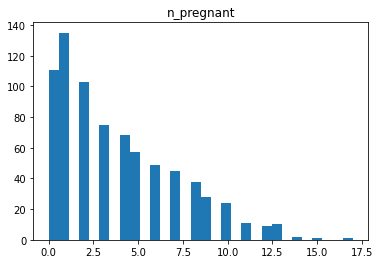

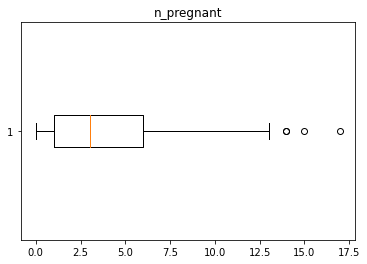

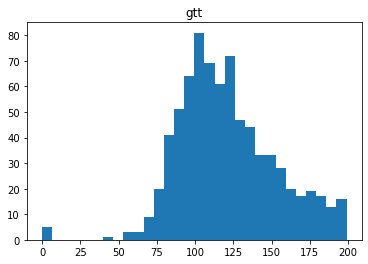

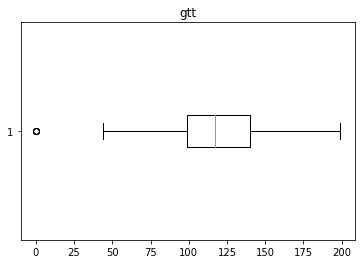

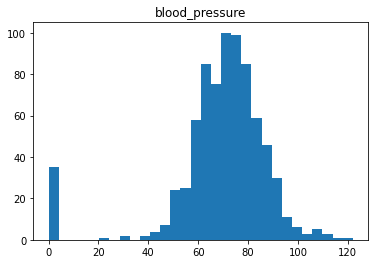

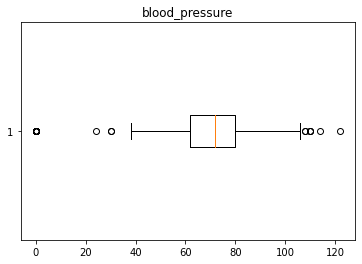

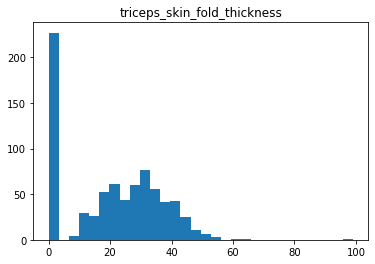

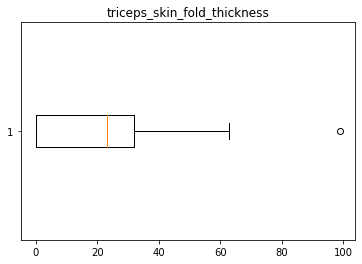

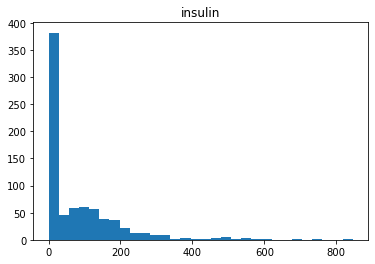

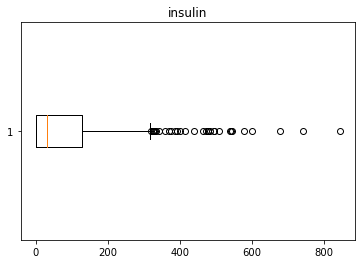

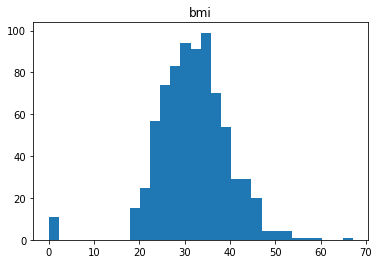

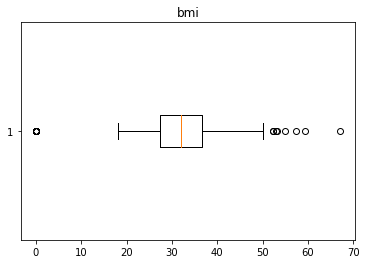

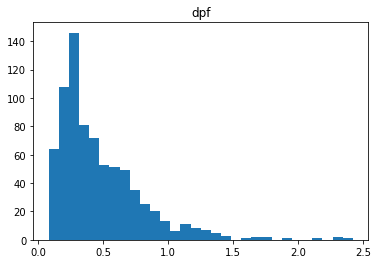

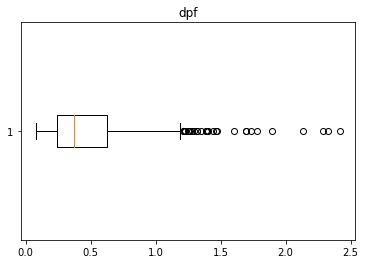

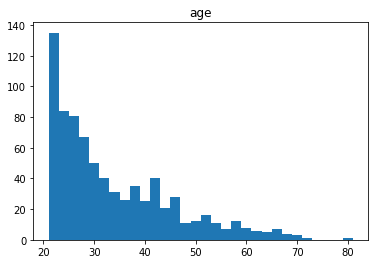

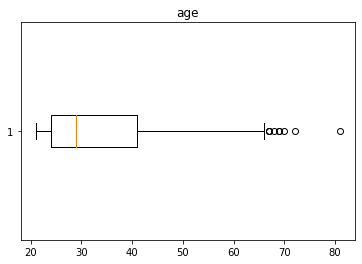

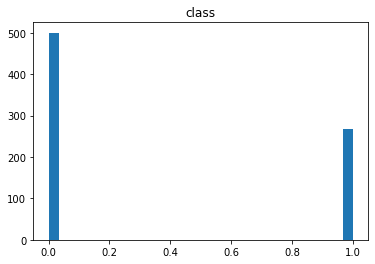

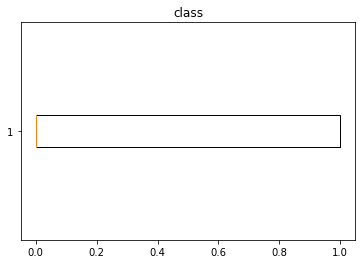

In [124]:
def gen_hist(column):
    plt.hist(data[column], bins=30)
    plt.title(column)
    plt.show()

def gen_boxplot(column):
    plt.boxplot(data[column], vert = False)
    plt.title(column)
    plt.show()

for i in data:
    gen_hist(i)
    gen_boxplot(i)

In [125]:
def count_zero(column):
    print(column, (data[column] == 0).sum())
    
for i in data:
    count_zero(i)

n_pregnant 111
gtt 5
blood_pressure 35
triceps_skin_fold_thickness 227
insulin 373
bmi 11
dpf 0
age 0
class 500


In [126]:
# show rows where gtt is 0
data[data['gtt'] == 0]

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
74,1,0,48,20,0,24.7,0.140,22,0
181,1,0,74,20,23,27.7,0.299,21,0
341,1,0,68,35,0,32.0,0.389,22,0
348,5,0,80,32,0,41.0,0.346,37,1
501,6,0,68,41,0,39.0,0.727,41,1


# Aufgabe 2b
Stelle sicher, dass alle fehlenden Werte sauber mit ‘NaN‘ markiert sind und stelle die Verteilung der
einzelnen Merkmale danach noch einmal graphisch mit Histogrammen dar.

In [127]:
data.replace(0, np.nan, inplace=True)

In [128]:
# Überprüfen dass die 0 Werte ersetzt wurden
for i in data:
    count_zero(i)

n_pregnant 0
gtt 0
blood_pressure 0
triceps_skin_fold_thickness 0
insulin 0
bmi 0
dpf 0
age 0
class 0


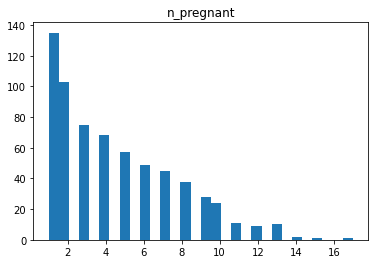

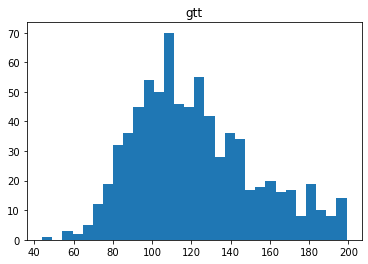

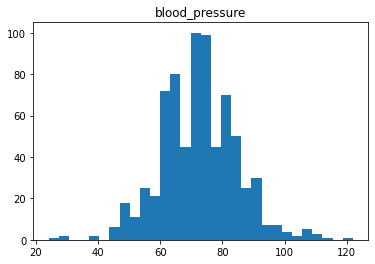

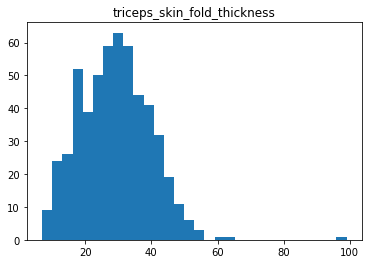

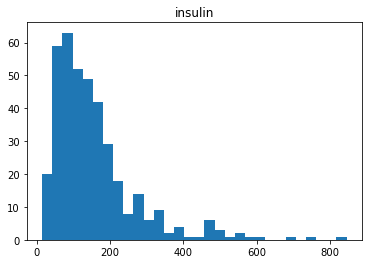

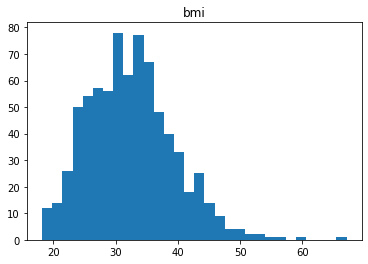

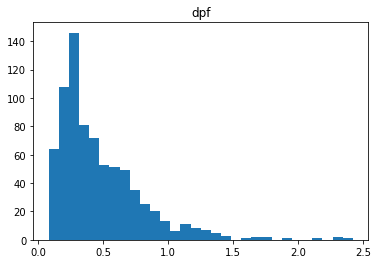

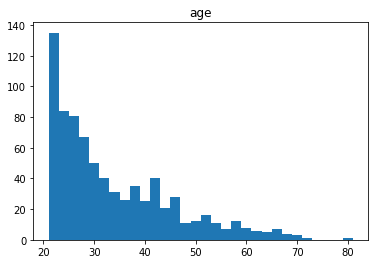

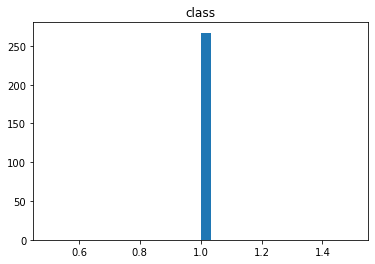

In [130]:
for i in data:
    gen_hist(i)

# Aufgabe 2c
Wie hängen die Merkmale mit der Zielvariable ’class’ zusammen? Fallen dir Merkmale auf, die
bereits klare Hinweise auf das Diabetesrisiko geben? Benutze eine geeignete graphische Darstellung.
